# Temas Tratados en el Trabajo Práctico 8

* Aprendizaje estadístico.

* Evolución de la verosimilitud de una hipótesis en función de observaciones.

* Aprendizaje no supervisado. Algoritmo K-means.

* Aprendizaje supervisado. Algoritmo Knn.

* Aprendizaje por refuerzo. Algoritmo Q-Learning.

## Ejercicios Teóricos

1. Un fabricante de tornillos vende cajas que contienen 1000 tornillos de cabeza redonda con tres tipos de recubrimiento electrolítico (cincado, cobre y níquel). Cada caja se rellena
con diferentes proporciones que pueden variar de la siguiente manera:

&emsp;&emsp;a: Todos los tornillos están recubiertos de níquel. 15 de cada 100 cajas se llenan de esta manera.

&emsp;&emsp;b: El 70% de los tornillos están recubiertos de níquel, el 20% de cobre, el resto está cincado. 15 de cada 100 cajas se llenan de esta manera.

&emsp;&emsp;c: El 50% de los tornillos están recubiertos de níquel, el 25% de cobre y el resto está cincado. 50 de cada 100 cajas se llenan de esta manera.

&emsp;&emsp;d: El 20 % de los tornillos están recubiertos de níquel, el 50% de cobre y el resto está cincado. 10 de cada 100 cajas se llenan de esta manera.

&emsp;&emsp;e: Todos los tornillos están recubiertos de cobre. 10 de cada 100 cajas se llenan de esta manera.

&emsp;&emsp;1.1 ¿Cuál es la distribución a priori sobre las hipótesis?

La distribución de probabilidad a priori es de:
$$H=<0.15,0.15,0.5,0.1,0.1>$$


&emsp;Considerando que los 10 primeros tornillos que se extraen de una caja de muestra son de cobre:

&emsp;&emsp;1.2 Calcule la probabilidad de cada hipótesis dado que los 10 primeros tornillos fueron de cobre.

Las probabilidades son las siguientes:
$$P(h1|D)=0$$

$$P(h2|D)=1.53E-7$$

$$P(h3|D)=4.76E-6$$

$$P(h4|D)=0.0009756$$

$$P(h5|D)=0.999$$

![image.png](./Images/Tabla.png)


&emsp;&emsp;1.3 Grafique la evolución de la verosimilitud de cada hipótesis en función del número de tornillos extraídos de la caja.

![image.png](./Images/Grafico.png)

&emsp;&emsp;1.4 Para cada hipótesis, ¿cuál es la probabilidad de que el cuarto tornillo extraído sea de cobre?

Se calcula la probabilidad de que salga cobre 4 veces
$$P(D|h1)=0^4=0$$
$$P(D|h2)=0.2^4=0.0016$$
$$P(D|h3)=0.25^4=0.0039$$
$$P(D|h4)=0.5^4=0.625$$
$$P(D|h5)=1^4=1$$

2. ¿Qué diferencia principal existe entre un algoritmo supervisado y un algoritmo no supervisado?

La diferencia principal entre aprendizaje supervisado y no supervisado está en la forma en que se entrena al algoritmo y en la información disponible en los datos:

1. Aprendizaje supervisado

- Se entrena al algoritmo con ejemplos que ya tienen una etiqueta o respuesta correcta.

- Objetivo: que el sistema aprenda a predecir esa salida para nuevos casos.


2. Aprendizaje no supervisado

- Se entrena con datos que no tienen etiquetas, es decir, no sabemos de antemano cuál es la “respuesta correcta”.

- Objetivo: que el algoritmo encuentre patrones ocultos o estructuras en los datos.


## Ejercicios de implementación

3. Genere un conjunto de 23 puntos que contengan coordenadas *xy* aleatorias con valores contenidos en el intervalo [0, 5] y grafique los puntos obtenidos en un gráfico.

&emsp;&emsp;3.1 Implemente un algoritmo K-means que clasifique 20 de los puntos en 2 grupos y grafique el resultado asignando un color a cada uno.

&emsp;&emsp;3.2 Tome los tres puntos restantes y clasifíquelos en los grupos obtenidos anteriormente usando el algoritmo Knn. Utilice distintos valores de K y anote lo que observa con esta elección.

K-means terminado en 4 iteraciones. Convergió: True
Centroides finales:
  C0: [2.76819101 4.03928077]
  C1: [2.69229459 1.44838235]


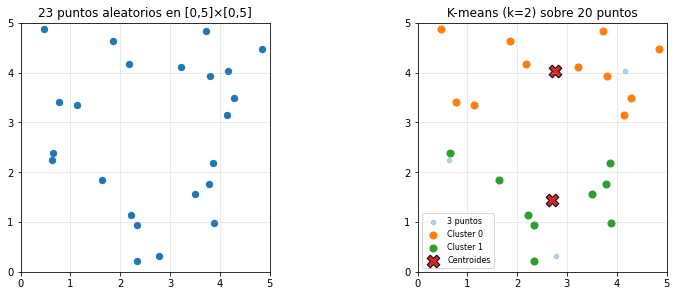


Clasificación de los 3 puntos restantes con k-NN (k=3):
  Punto restante 1 [0.64056816 2.25192969] -> Cluster 1
  Punto restante 2 [2.77292394 0.31908628] -> Cluster 1
  Punto restante 3 [4.16129901 4.02382179] -> Cluster 0


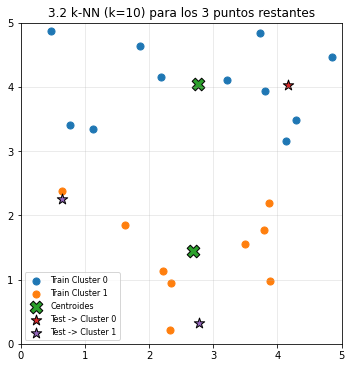

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, k=2, max_iter=100, tol=1e-6, seed=0):
    
    # Reseteo el rng para que los centroides iniciales 
    # cambien en cada ejecución
    rng = np.random.default_rng()

    # Elijo k puntos aleatorios distintos como centroides iniciales
    idx_init = rng.choice(len(X), size=k, replace=False)
    centroids = X[idx_init].copy()

    for it in range(1, max_iter + 1):
        
        # Distancias de cada punto a los centroides
        dists = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)  
        labels = np.argmin(dists, axis=1)

        # Actualización de centroides
        new_centroids = centroids.copy()
        for c in range(k):
            pts = X[labels == c]
            if len(pts) == 0:
                # Si un clúster quedó vacío, re-inicializar su centroide a un punto aleatorio
                new_centroids[c] = X[rng.integers(0, len(X))]
            else:
                new_centroids[c] = pts.mean(axis=0)

        # Criterio de parada por cambio de centroides
        shift = np.linalg.norm(new_centroids - centroids, axis=1)
        centroids = new_centroids
        if np.all(shift <= tol):
            return centroids, labels, it, True  

    return centroids, labels, max_iter, False  # Llegó al máximo de iteraciones



rng = np.random.default_rng(42)

# Puntos aleatorios
puntos = rng.uniform(0.0, 5.0, size=(23, 2))

idx_20 = rng.choice(23, size=20, replace=False)
X20 = puntos[idx_20]

# Ejecutar K-means con k=2
k = 2
max_iter = 100
tol = 1e-6
centroids, labels, iters, converged = kmeans(X20, k=k, max_iter=max_iter, tol=tol, seed=123)

print(f"K-means terminado en {iters} iteraciones. Convergió: {converged}")
print("Centroides finales:")
for i, c in enumerate(centroids):
    print(f"  C{i}: {c}")

# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(11, 4), constrained_layout=True)

# --- Izquierda: los 23 puntos
ax = axes[0]
ax.scatter(puntos[:, 0], puntos[:, 1], s=40)
ax.set_title("23 puntos aleatorios en [0,5]×[0,5]")
ax.set_xlim(0, 5); ax.set_ylim(0, 5)
ax.set_aspect('equal', adjustable='box')
ax.grid(True, alpha=0.3)

# --- Derecha: resultado de K-means sobre 20 puntos
ax = axes[1]
ax.scatter(puntos[:, 0], puntos[:, 1], s=20, alpha=0.3, label="3 puntos")

# Colorear sólo los 20 usados
for cl in range(k):
    pts_cl = X20[labels == cl]
    ax.scatter(pts_cl[:, 0], pts_cl[:, 1], s=50, label=f"Cluster {cl}")

ax.scatter(centroids[:, 0], centroids[:, 1],
            marker='X', s=160, edgecolor='k', linewidths=1.0, label="Centroides")

ax.set_title("K-means (k=2) sobre 20 puntos")
ax.set_xlim(0, 5); ax.set_ylim(0, 5)
ax.set_aspect('equal', adjustable='box')
ax.grid(True, alpha=0.3)
ax.legend(loc="best", fontsize=8)

plt.show()

# 3.2 Clasificar los 3 puntos restantes con k-NN (k=3)

def knn_predict(X_train, y_train, X_test, k=3):
    """
    Clasificador k-NN (k vecinos más cercanos) con voto mayoritario.
    En caso de empate, decide por la etiqueta del vecino más cercano.
    """
    y_train = np.asarray(y_train)
    preds = []
    for x in X_test:
        d = np.linalg.norm(X_train - x, axis=1)
        # índices de los k más cercanos
        nn_idx = np.argpartition(d, k)[:k]
        votes = y_train[nn_idx]
        vals, counts = np.unique(votes, return_counts=True)
        maxc = counts.max()
        candidatos = vals[counts == maxc]
        if len(candidatos) == 1:
            preds.append(candidatos[0])
        else:
            # Desempate: vecino más cercano
            nearest = nn_idx[np.argmin(d[nn_idx])]
            preds.append(y_train[nearest])
    return np.array(preds)

# Identificar los 3 puntos restantes (no usados en K-means)
mask_restantes = np.ones(23, dtype=bool)
mask_restantes[idx_20] = False
restantes = puntos[mask_restantes]

k_knn = 3
pred_restantes = knn_predict(X20, labels, restantes, k=k_knn)

print("\nClasificación de los 3 puntos restantes con k-NN (k=3):")
for i, (p, lab) in enumerate(zip(restantes, pred_restantes), 1):
    print(f"  Punto restante {i} {p} -> Cluster {lab}")

# Graficar resultado de k-NN en una figura aparte 
fig2, ax2 = plt.subplots(figsize=(5.5, 5), constrained_layout=True)

for cl in range(k):
    pts_cl = X20[labels == cl]
    ax2.scatter(pts_cl[:, 0], pts_cl[:, 1], s=50, label=f"Train Cluster {cl}")

ax2.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=160, edgecolor='k', linewidths=1.0, label="Centroides")

for cl in range(k):
    pts_test = restantes[pred_restantes == cl]
    if len(pts_test):
        ax2.scatter(pts_test[:, 0], pts_test[:, 1], s=120, marker='*', edgecolor='k', linewidths=1.0,
                    label=f"Test -> Cluster {cl}")

ax2.set_title(f"3.2 k-NN (k={k_knn}) para los 3 puntos restantes")
ax2.set_xlim(0, 5); ax2.set_ylim(0, 5)
ax2.set_aspect('equal', adjustable='box')
ax2.grid(True, alpha=0.3)
ax2.legend(loc="best", fontsize=8)

plt.show()


En el clasificador k-NN, el parámetro 𝑘 controla el radio efectivo de vecindad y, por ende, el compromiso sesgo–varianza: valores pequeños inducen estimadores de riesgo con bajo sesgo pero alta varianza y fronteras altamente irregulares, sensibles a ruido y atípicos.
Conforme 𝑘 aumenta, la estimación local de la distribución de clases se suaviza, disminuye la varianza y crece el sesgo al promediar sobre regiones mayores.

# Distintos k en nuestro código:

![distintos_k.png](Images/distintos_k.png)

4. La imagen mostrada abajo muestra una red de salas y cómo se comunican entre ellas. Implemente un algoritmo Q-Learning con un factor despreciativo $γ = 0.9$. La matriz de recompensas debe asignar un valor de 0 a cada camino accesible y un valor de 100 a caminos que lleven a la sala del tesoro.

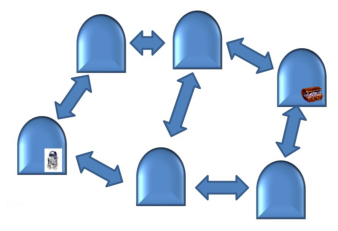

In [45]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL directa de Google Drive
url = "https://drive.google.com/uc?export=view&id=1dkDruEIPa7f-BAmjI47TZl3bxaqYf6a9"

# Descargar la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar ejes
plt.show()

&emsp;&emsp;4.1 Dibuje un diagrama con la asignación de recompensas correspondiente a cada estado.

&emsp;&emsp;4.2 Diseñe y muestre la matriz de recompensas.

&emsp;&emsp;4.3 Obtenga la matriz Q óptima, normalícela respecto al valor máximo encontrado y grafique la política obtenida en el diagrama mostrado inicialmente.

# Diagrama
![diagrama.png](Images/diagrama.png)

# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2017) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)